# Capstone Project

In [79]:
import numpy as np
import pandas as pd

In [80]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Introduction/Business Problem 

# Load Data 

In [81]:
!wget 'https://github.com/dr-askar/IBM_capstone/raw/master/Data-Collisions.csv'

--2020-10-29 04:22:31--  https://github.com/dr-askar/IBM_capstone/raw/master/Data-Collisions.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dr-askar/IBM_capstone/master/Data-Collisions.csv [following]
--2020-10-29 04:22:32--  https://raw.githubusercontent.com/dr-askar/IBM_capstone/master/Data-Collisions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73722965 (70M) [text/plain]
Saving to: ‘Data-Collisions.csv.1’

Data-Collisions.csv 100%[===================>]  70.31M   191MB/s    in 0.4s    

2020-10-29 04:22:32 (191 MB/s) - ‘Data-Collisions.csv.1’ saved [73722965/73722965]



In [82]:
!ls

Data-Collisions.csv  Data-Collisions.csv.1  sample_data


In [83]:
df=pd.read_csv(r'Data-Collisions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# remove unnecessary features

In [84]:
#df.iloc[:,38]
drop=['OBJECTID','INCKEY','INTKEY','COLDETKEY','REPORTNO','STATUS' ,'LOCATION','EXCEPTRSNDESC','EXCEPTRSNCODE','SEVERITYCODE.1','SEVERITYDESC'
     ,'INCDATE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC']
df1=df.drop(drop,axis=1)
df1.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,0,0,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,0,0,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,0,0,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,0,0,N
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10,0,0,N


# percentage of na value in each feature

In [85]:
for i in df1.columns:
    print(100*df1.isna()[i].value_counts()/df1.isna()[i].count())
#x=[X,Y,ADDRTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR]    
#Y=[SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE]

False    100.0
Name: SEVERITYCODE, dtype: float64
False    97.260021
True      2.739979
Name: X, dtype: float64
False    97.260021
True      2.739979
Name: Y, dtype: float64
False    99.010649
True      0.989351
Name: ADDRTYPE, dtype: float64
False    97.480904
True      2.519096
Name: COLLISIONTYPE, dtype: float64
False    100.0
Name: PERSONCOUNT, dtype: float64
False    100.0
Name: PEDCOUNT, dtype: float64
False    100.0
Name: PEDCYLCOUNT, dtype: float64
False    100.0
Name: VEHCOUNT, dtype: float64
False    100.0
Name: INCDTTM, dtype: float64
False    96.748907
True      3.251093
Name: JUNCTIONTYPE, dtype: float64
False    100.0
Name: SDOT_COLCODE, dtype: float64
True     84.68971
False    15.31029
Name: INATTENTIONIND, dtype: float64
False    97.491178
True      2.508822
Name: UNDERINFL, dtype: float64
False    97.389982
True      2.610018
Name: WEATHER, dtype: float64
False    97.425426
True      2.574574
Name: ROADCOND, dtype: float64
False    97.344264
True      2.655736
Name: L

# consider Nan values as No in INATTENTIONIND,UNDERINFL,SPEEDING,PEDROWNOTGRNT

In [86]:

df1['INATTENTIONIND'].replace(np.NAN,'N',inplace=True)
df1['UNDERINFL'].replace('0','N',inplace=True)
df1['UNDERINFL'].replace('1','Y',inplace=True)
df1['SPEEDING'].replace(np.NAN,'N',inplace=True)
df1['PEDROWNOTGRNT'].replace(np.NAN,'N',inplace=True)

# deal with other and unknown values as NaN 

In [87]:

df1['COLLISIONTYPE'].replace('Other',np.NAN,inplace=True)
df1['JUNCTIONTYPE'].replace('Unknown',np.NAN,inplace=True)
df1['WEATHER'].replace('Other',np.NAN,inplace=True)
df1['WEATHER'].replace('Unknown',np.NAN,inplace=True)
df1['ROADCOND'].replace('Other',np.NAN,inplace=True)
df1['ROADCOND'].replace('Unknown',np.NAN,inplace=True)
df1['LIGHTCOND'].replace('Other',np.NAN,inplace=True)
df1['LIGHTCOND'].replace('Unknown',np.NAN,inplace=True)


# drop NaN values for SEVERITYCODE

In [88]:

df1.dropna(subset=['SEVERITYCODE'],how='any',inplace=True)

# separate to tow main classes 1 and 2

In [89]:

df_1=df1[df1['SEVERITYCODE']==1]
df_2=df1[df1['SEVERITYCODE']==2]

In [90]:
# compute mean values for each numeric feature for each class after removing NaN

In [91]:

mean1=df_1[ df_1.notna()]._get_numeric_data().mean()

mean2=df_2[ df_2.notna()]._get_numeric_data().mean()


In [92]:
# make dictionaries for mean values

In [93]:

mean1={'X':mean1[1],'Y':mean1[2],'PERSONCOUNT':mean1[3],'PEDCOUNT':mean1[4],'PEDCYLCOUNT':mean1[5],'VEHCOUNT':mean1[6],'SDOT_COLCODE':mean1[7],'SEGLANEKEY':mean1[8],'CROSSWALKKEY':mean1[9]}

mean2={'X':mean2[1],'Y':mean2[2],'PERSONCOUNT':mean2[3],'PEDCOUNT':mean2[4],'PEDCYLCOUNT':mean2[5],'VEHCOUNT':mean2[6],'SDOT_COLCODE':mean2[7],'SEGLANEKEY':mean2[8],'CROSSWALKKEY':mean2[9]}


In [94]:
#fill NaN in numeric features with suitable values

In [95]:

df_1.fillna(value=mean1,axis=0,inplace=True)
df_2.fillna(value=mean2,axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


# fill object features NaN values with Mode values for class 1 

In [96]:

for i in df_1[ df_1.notna()].columns:
    if df_1[ df_1.notna()].loc[:,i].dtype=='object':
        df_1.loc[:,i].fillna(value=df_1[ df_1.notna()].loc[:,i].value_counts().idxmax(),axis=0,inplace=True)
        print(i,':',df_1[ df_1.notna()].loc[:,i].value_counts().idxmax())


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


ADDRTYPE : Block
COLLISIONTYPE : Parked Car
INCDTTM : 10/3/2008
JUNCTIONTYPE : Mid-Block (not related to intersection)
INATTENTIONIND : N
UNDERINFL : N
WEATHER : Clear
ROADCOND : Dry
LIGHTCOND : Daylight
PEDROWNOTGRNT : N
SPEEDING : N
ST_COLCODE : 32
HITPARKEDCAR : N


# fill object features NaN values with Mode values for class 2

In [97]:

for i in df_2[ df_2.notna()].columns:
    if df_2[ df_2.notna()].loc[:,i].dtype=='object':
        df_2.loc[:,i].fillna(value=df_2[ df_2.notna()].loc[:,i].value_counts().idxmax(),axis=0,inplace=True)
        print(i,':',df_2[ df_2.notna()].loc[:,i].value_counts().idxmax())


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


ADDRTYPE : Block
COLLISIONTYPE : Rear Ended
INCDTTM : 11/2/2006
JUNCTIONTYPE : At Intersection (intersection related)
INATTENTIONIND : N
UNDERINFL : N
WEATHER : Clear
ROADCOND : Dry
LIGHTCOND : Daylight
PEDROWNOTGRNT : N
SPEEDING : N
ST_COLCODE : 10
HITPARKEDCAR : N


In [98]:
# dataframe after cleaning

In [99]:

df1=pd.concat([df_1,df_2])
df1.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,N,N,Raining,Wet,Dark - Street Lights On,N,N,11,0,0,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,N,N,Overcast,Dry,Daylight,N,N,32,0,0,N
3,1,-122.334803,47.604803,Block,Parked Car,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,N,N,Clear,Dry,Daylight,N,N,23,0,0,N
5,1,-122.387598,47.690575,Intersection,Angles,2,0,0,2,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,N,N,Clear,Dry,Daylight,N,N,10,0,0,N
6,1,-122.338485,47.618534,Intersection,Angles,2,0,0,2,12/9/2008,At Intersection (intersection related),11,N,N,Raining,Wet,Daylight,N,N,10,0,0,N


# study the relationship beatween sevirtity and features

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,normaltest

In [101]:
#function to draw bar chart for categorical features clustered according to severitycode classes (1,2)
# y axis show the persent value of each class for each category in categorical features
def draw_bar_perc(c):
    ((df1.groupby([c,'SEVERITYCODE']).count()['ST_COLCODE']/df1.groupby([c]).count()['ST_COLCODE'])*100).unstack().plot(kind='bar')
    


In [102]:
def draw_bar_count(c):
    ((df1.groupby([c,'SEVERITYCODE']).count()['ST_COLCODE'])).unstack().plot(kind='bar')

0.0

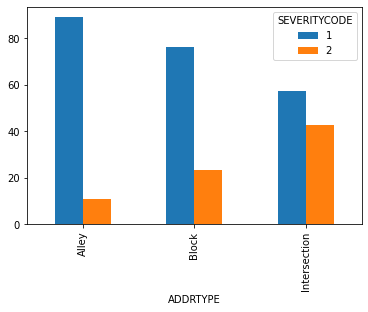

In [103]:
draw_bar_perc('ADDRTYPE')
chi2_contingency(pd.crosstab(df1['ADDRTYPE'],df1['SEVERITYCODE']))[1]

0.0

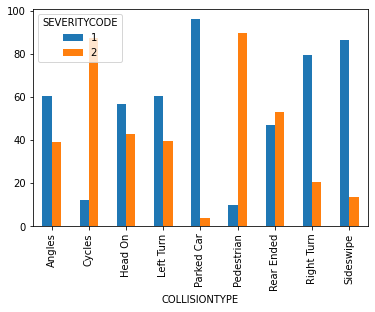

In [104]:
draw_bar_perc('COLLISIONTYPE')
chi2_contingency(pd.crosstab(df1['COLLISIONTYPE'],df1['SEVERITYCODE']))[1]

0.0

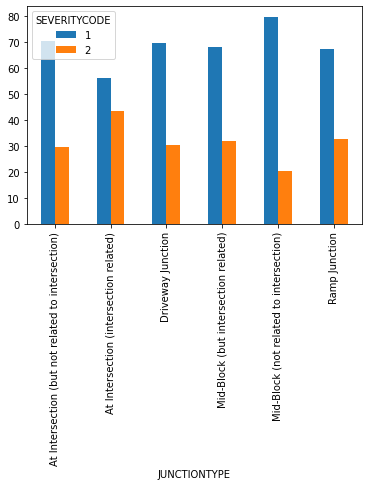

In [105]:
draw_bar_perc('JUNCTIONTYPE')
chi2_contingency(pd.crosstab(df1['JUNCTIONTYPE'],df1['SEVERITYCODE']))[1]

5.335191180698436e-93

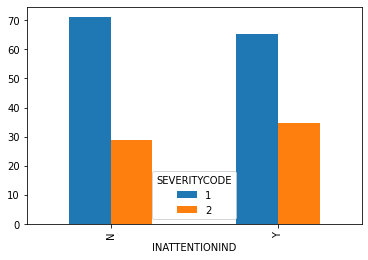

In [106]:
draw_bar_perc('INATTENTIONIND')
chi2_contingency(pd.crosstab(df1['INATTENTIONIND'],df1['SEVERITYCODE']))[1]

2.8963951861952226e-85

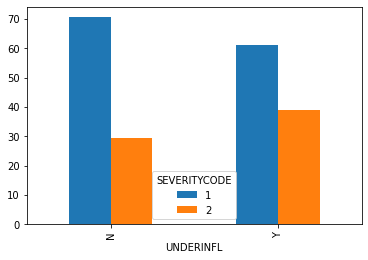

In [107]:
draw_bar_perc('UNDERINFL')
chi2_contingency(pd.crosstab(df1['UNDERINFL'],df1['SEVERITYCODE']))[1]

1.0022761144840179e-86

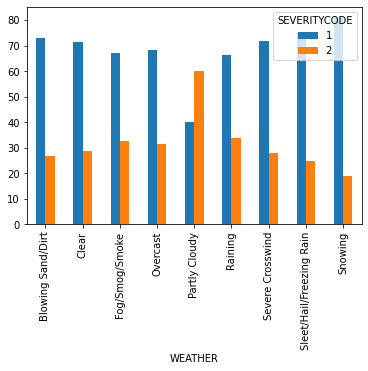

In [108]:
draw_bar_perc('WEATHER')
chi2_contingency(pd.crosstab(df1['WEATHER'],df1['SEVERITYCODE']))[1]

2.6123792997913166e-88

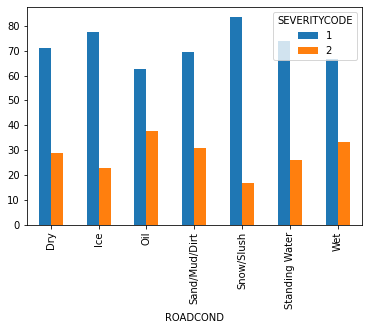

In [109]:
draw_bar_perc('ROADCOND')
chi2_contingency(pd.crosstab(df1['ROADCOND'],df1['SEVERITYCODE']))[1]

5.336920968434019e-18

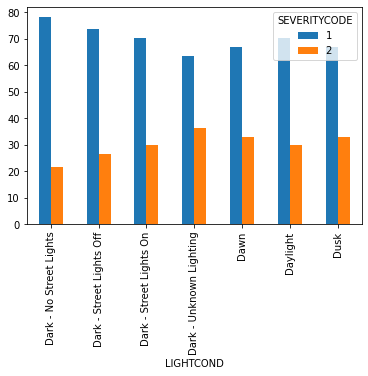

In [110]:
draw_bar_perc('LIGHTCOND')
chi2_contingency(pd.crosstab(df1['LIGHTCOND'],df1['SEVERITYCODE']))[1]

1.0022761144840179e-86

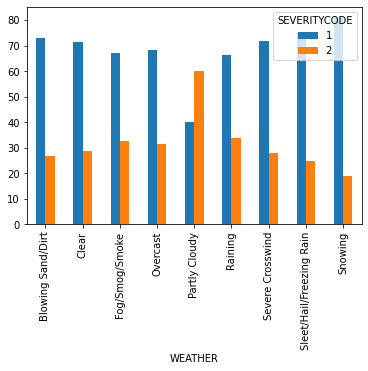

In [111]:
draw_bar_perc('WEATHER')
chi2_contingency(pd.crosstab(df1['WEATHER'],df1['SEVERITYCODE']))[1]

4.5554876319924223e-66

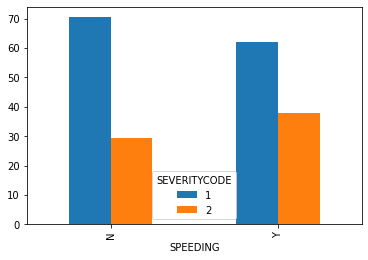

In [112]:
draw_bar_perc('SPEEDING')
chi2_contingency(pd.crosstab(df1['SPEEDING'],df1['SEVERITYCODE']))[1]

0.0

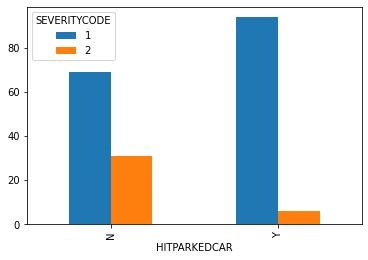

In [113]:
draw_bar_perc('HITPARKEDCAR')
chi2_contingency(pd.crosstab(df1['HITPARKEDCAR'],df1['SEVERITYCODE']))[1]

0.0

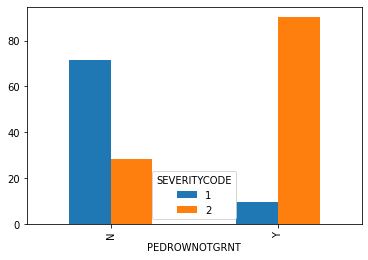

In [114]:
draw_bar_perc('PEDROWNOTGRNT')
chi2_contingency(pd.crosstab(df1['PEDROWNOTGRNT'],df1['SEVERITYCODE']))[1]

# Date & Time

In [115]:
df1['INCDTTM']=pd.to_datetime(df1['INCDTTM'])

0.29460148535864267

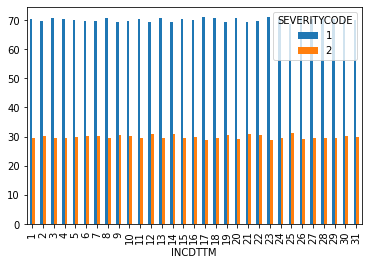

In [116]:
draw_bar_perc(df1['INCDTTM'].dt.day)
chi2_contingency(pd.crosstab(df1['INCDTTM'].dt.day,df1['SEVERITYCODE']))[1]

3.590857347063849e-18

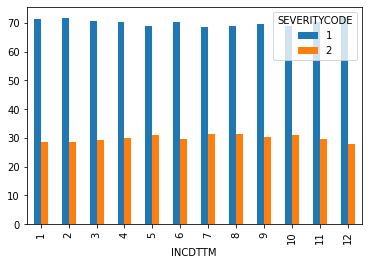

In [117]:
draw_bar_perc(df1['INCDTTM'].dt.month)
chi2_contingency(pd.crosstab(df1['INCDTTM'].dt.month,df1['SEVERITYCODE']))[1]

2.1322482284151897e-39

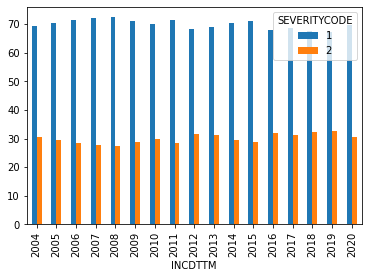

In [118]:
draw_bar_perc(df1['INCDTTM'].dt.year)
chi2_contingency(pd.crosstab(df1['INCDTTM'].dt.year,df1['SEVERITYCODE']))[1]

8.104007576719765e-167

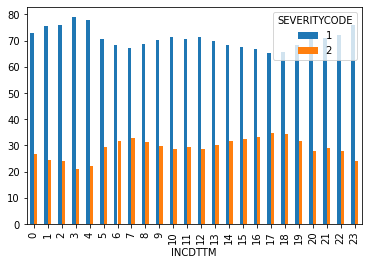

In [119]:
draw_bar_perc(df1['INCDTTM'].dt.hour)
chi2_contingency(pd.crosstab(df1['INCDTTM'].dt.hour,df1['SEVERITYCODE']))[1]

# choose only hour and month to use as features

In [120]:
df1['Hour']=df1['INCDTTM'].dt.hour
df1['Month']=df1['INCDTTM'].dt.month
#df1['Year']=df1['INCDTTM'].dt.year



In [121]:
# convert person count to 3 category

In [122]:
#ax=plt.subplot(111)
bins = [-1,30,60,np.inf]
names = ['<30', '30-60',  '>60']

df1['PERSONCOUNT_cat'] = pd.cut(df1['PERSONCOUNT'], bins, labels=names)


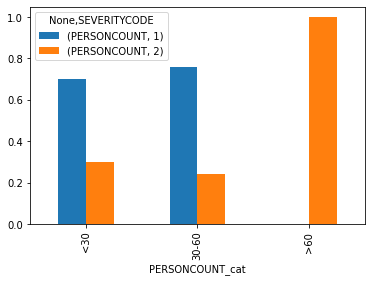

In [123]:
data=((df1[['PERSONCOUNT_cat','PERSONCOUNT','SEVERITYCODE']].groupby(['PERSONCOUNT_cat','SEVERITYCODE',]).count())/df1[['PERSONCOUNT_cat','PERSONCOUNT']].groupby(['PERSONCOUNT_cat']).count()).unstack()
#plt.bar(x='PERSONCOUNT_cat',height='PERSONCOUNT',data=data)
data.plot(kind='bar')

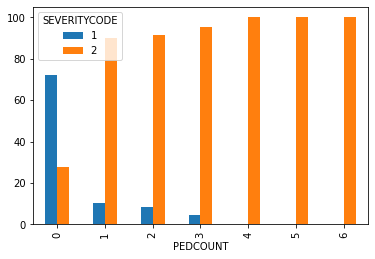

In [124]:
draw_bar_perc(df1['PEDCOUNT'])

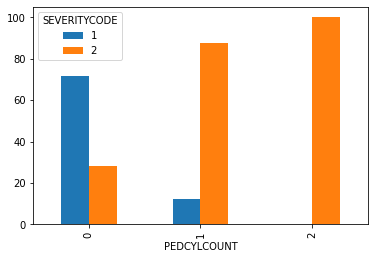

In [125]:
draw_bar_perc(df1['PEDCYLCOUNT'])

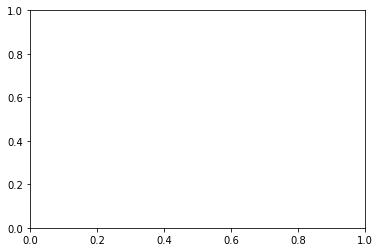

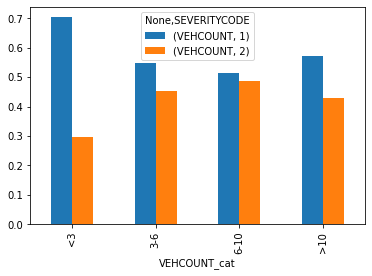

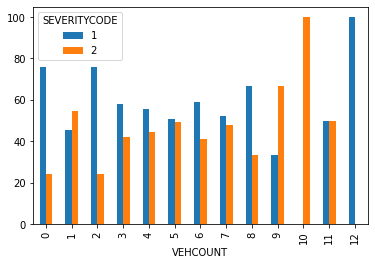

In [126]:
ax=plt.subplot(111)
bins = [-1,3,6,10,np.inf]
names = ['<3', '3-6','6-10',  '>10']

df1['VEHCOUNT_cat'] = pd.cut(df1['VEHCOUNT'], bins, labels=names)

data=((df1[['VEHCOUNT_cat','VEHCOUNT','SEVERITYCODE']].groupby(['VEHCOUNT_cat','SEVERITYCODE',]).count())/df1[['VEHCOUNT_cat','VEHCOUNT']].groupby(['VEHCOUNT_cat']).count()).unstack()
data.plot(kind='bar')

draw_bar_perc(df1['VEHCOUNT'])

Text(0.5, 0, 'Y')

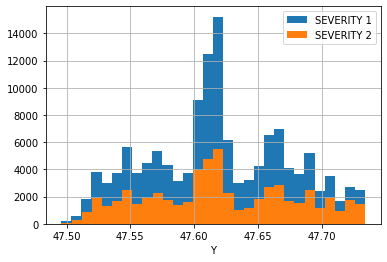

In [127]:
df1['Y'][df1['SEVERITYCODE']==1].hist(bins=30)
df1['Y'][df1['SEVERITYCODE']==2].hist(bins=30)
plt.legend(['SEVERITY 1','SEVERITY 2'])
plt.xlabel("Y")

Text(0.5, 0, 'X')

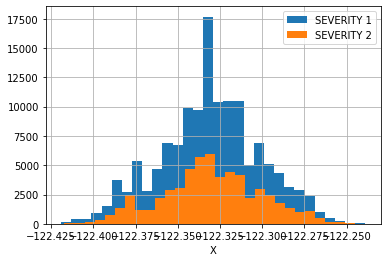

In [128]:
df1['X'][df1['SEVERITYCODE']==1].hist(bins=30)
df1['X'][df1['SEVERITYCODE']==2].hist(bins=30)
plt.legend(['SEVERITY 1','SEVERITY 2'])
plt.xlabel('X')

In [129]:
# analysis numeric features
df1._get_numeric_data().columns
#chi2_contingency(pd.crosstab(df1['ADDRTYPE'],df1['SEVERITYCODE']))[1]

Index(['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'Hour',
       'Month'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


[4.58574001e-06 3.66005171e-06 3.89767747e-06 ... 3.63155211e-06
 4.14150288e-06 5.15975230e-08]


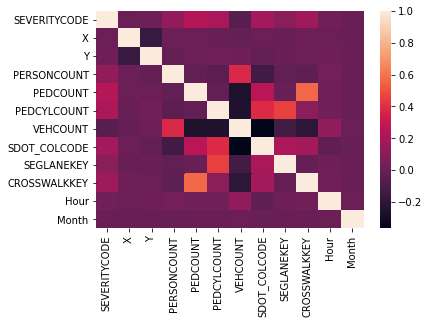

In [130]:
sns.heatmap(df1.corr())
print(normaltest(df1._get_numeric_data(),axis=1)[1])

# apply standard scaler to numeric feature

In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=scaler.fit_transform(df1._get_numeric_data())
df2=pd.DataFrame(df2,columns=df1._get_numeric_data().columns)
df2['SEVERITYCODE']=df2['SEVERITYCODE'].apply(lambda x:1 if ( x<0) else 2 )


In [132]:
# applt t test (large sample) and draw box

X Ttest_indResult(statistic=-4.600169708800576, pvalue=4.224122661086044e-06)
-0.006807284150664517 0.0159670751767419
Y Ttest_indResult(statistic=-7.9156382379644, pvalue=2.4727048728788962e-15)
-0.04937123415429224 -0.04937123415429224
PERSONCOUNT Ttest_indResult(statistic=-58.27876111972112, pvalue=0.0)
-0.33020207385511424 -0.33020207385511424
PEDCOUNT Ttest_indResult(statistic=-112.14401726708239, pvalue=0.0)
-0.18743028624854363 -0.18743028624854363
PEDCYLCOUNT Ttest_indResult(statistic=-96.76261731490953, pvalue=0.0)
-0.16958840897224053 -0.16958840897224053
VEHCOUNT Ttest_indResult(statistic=24.164360243056954, pvalue=8.177903921506128e-129)
0.1255378252325378 0.1255378252325378
SDOT_COLCODE Ttest_indResult(statistic=-84.87588960356668, pvalue=0.0)
-0.4175102365871053 0.01925128298358212
SEGLANEKEY Ttest_indResult(statistic=-46.26023586762551, pvalue=0.0)
-0.08124849240009997 -0.08124849240009997
CROSSWALKKEY Ttest_indResult(statistic=-78.46606165264929, pvalue=0.0)
-0.13536152

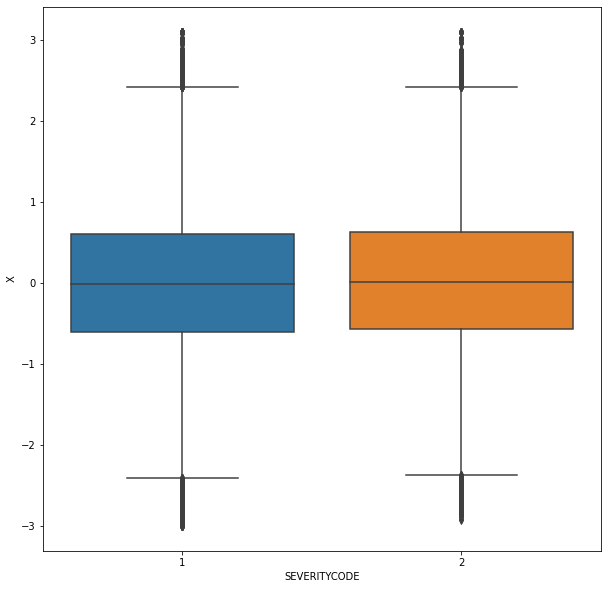

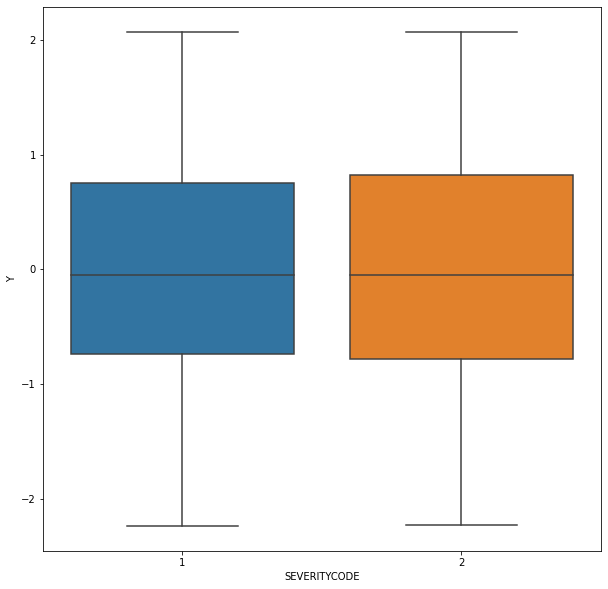

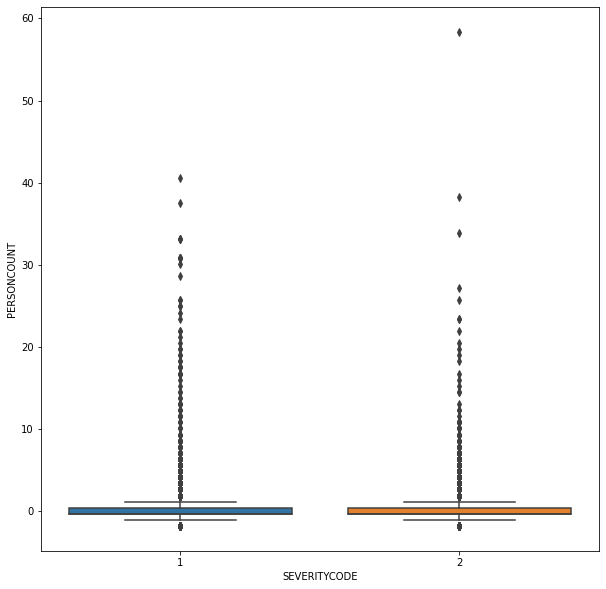

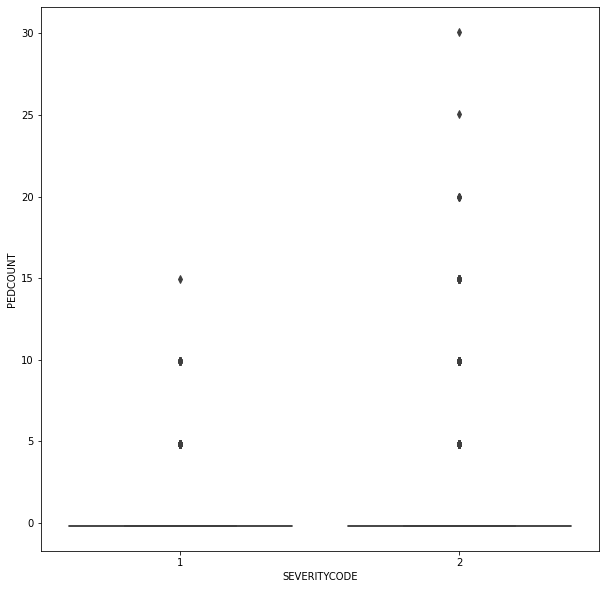

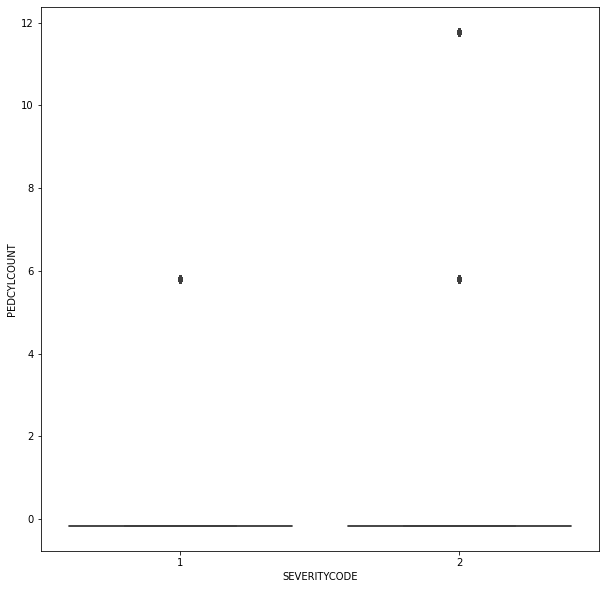

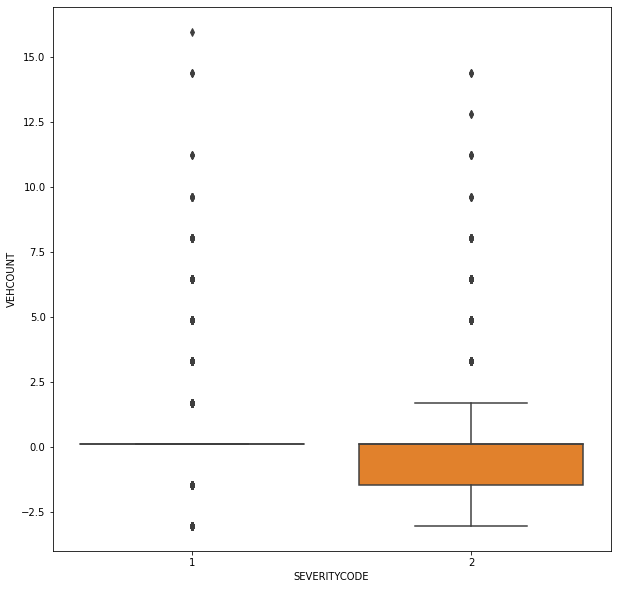

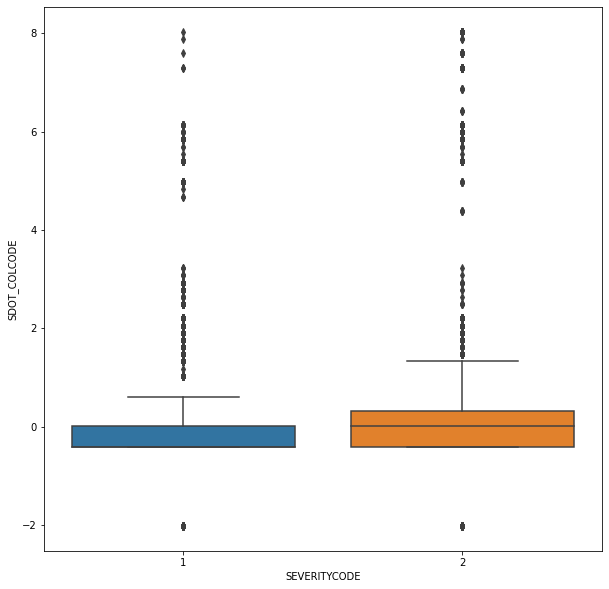

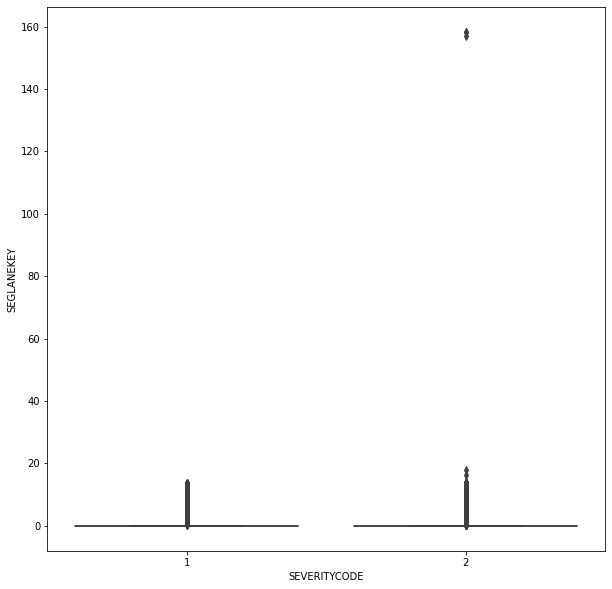

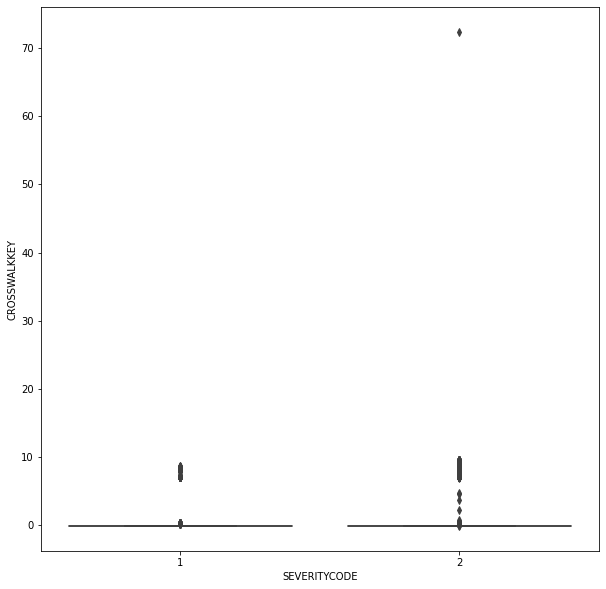

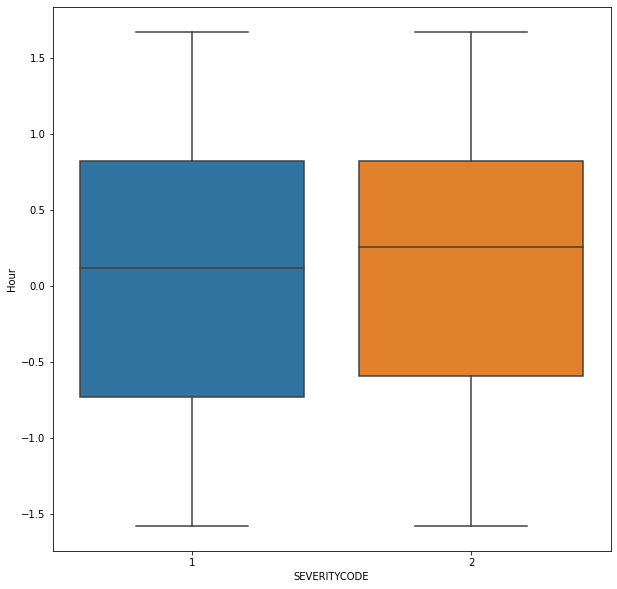

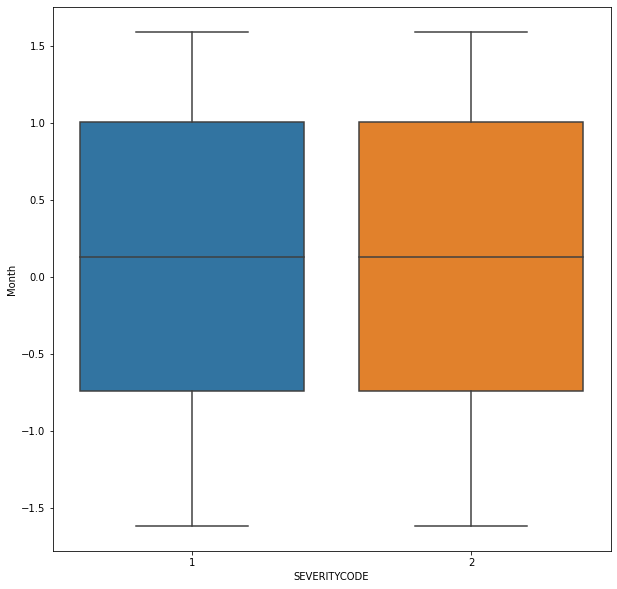

In [133]:
from scipy.stats import kruskal,mannwhitneyu,ttest_ind
for i in df2.columns[1:]:
    fig=plt.figure(figsize=(10,10))
    ax=plt.subplot(111)
    print(i,ttest_ind
         (df2[i][df2['SEVERITYCODE']==1],df2[i][df2['SEVERITYCODE']==2]))
    print(df2[i][df2['SEVERITYCODE']==1].median(),df2[i][df2['SEVERITYCODE']==2].median())
    sns.boxplot(x='SEVERITYCODE', y=i,  data=df2,ax=ax)
    #df2.boxplot(by='SEVERITYCODE',column=i)

# select features

In [134]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [135]:
x=['ADDRTYPE','COLLISIONTYPE','Hour','Month','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','LIGHTCOND','PEDROWNOTGRNT',
   'SPEEDING','HITPARKEDCAR']    
y=['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','Year','VEHCOUNT','SDOT_COLCODE','X','Y','SEGLANEKEY','CROSSWALKKEY']

In [136]:

X=df1[x]
Y=df1[y[0]]

In [137]:
X['X']=df2['X']
X['Y']=df2['Y']
X['PERSONCOUNT']=df2['PERSONCOUNT']
X['PEDCOUNT']=df2['PEDCOUNT']
X['PEDCYLCOUNT']=df2['PEDCYLCOUNT']
X['VEHCOUNT']=df2['VEHCOUNT']
X['Hour']=df2['Hour']
X['Month']=df2['Month']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [138]:
X.head()

,ADDRTYPE,COLLISIONTYPE,Hour,Month,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
1,Block,Sideswipe,-0.164955,1.297410,Mid-Block (not related to intersection),N,N,Raining,Dark - Street Lights On,N,N,N,-0.135973,-0.210629,1.155765,-0.18743,-0.169588,1.710211
2,Block,Parked Car,-0.306293,-1.034920,Mid-Block (not related to intersection),N,N,Overcast,Daylight,N,N,N,-0.144879,-0.266036,0.412781,-0.18743,-0.169588,1.710211
3,Block,Parked Car,0.824405,-0.743379,Mid-Block (not related to intersection),N,N,Clear,Daylight,N,N,N,-1.930751,1.282708,-0.330202,-0.18743,-0.169588,0.125538
5,Intersection,Angles,0.259056,-0.160297,At Intersection (intersection related),N,N,Clear,Daylight,N,N,N,-0.183002,-0.137824,-0.330202,-0.18743,-0.169588,0.125538
6,Intersection,Angles,0.965742,-0.451838,At Intersection (intersection related),N,N,Raining,Daylight,N,N,N,-0.006807,-0.011712,-0.330202,-0.18743,-0.169588,0.125538


In [139]:
# from categorial to separate columns

In [140]:
def to_gat(c,X):
    temp=label_binarize(X[c],classes=X[c].value_counts().index)
    temp=pd.DataFrame(temp,columns=X[c].value_counts().index)
    X=pd.concat([X,temp],axis=1)
    X.drop(columns=c,inplace=True)
    return X

In [141]:
obj=['ADDRTYPE','JUNCTIONTYPE','WEATHER','LIGHTCOND','COLLISIONTYPE'
     ]
num=['X','Y','SEGLANEKEY','CROSSWALKKEY']
#'SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR'
#'INCDTTM',
for i in obj:
    print(i)
    X=to_gat(i,X)

ADDRTYPE
JUNCTIONTYPE
WEATHER
LIGHTCOND
COLLISIONTYPE


In [142]:
X.head()

,Hour,Month,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,Block,Intersection,Alley,Mid-Block (not related to intersection),At Intersection (intersection related),Mid-Block (but intersection related),Driveway Junction,At Intersection (but not related to intersection),Ramp Junction,Clear,Raining,Overcast,Snowing,Fog/Smog/Smoke,Sleet/Hail/Freezing Rain,Blowing Sand/Dirt,Severe Crosswind,Partly Cloudy,Daylight,Dark - Street Lights On,Dusk,Dawn,Dark - No Street Lights,Dark - Street Lights Off,Dark - Unknown Lighting,Parked Car,Rear Ended,Angles,Sideswipe,Left Turn,Pedestrian,Cycles,Right Turn,Head On
0,0.965742,1.588951,N,N,N,N,N,-0.567408,0.499007,-0.330202,-0.18743,-0.169588,0.125538,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-0.164955,1.297410,N,N,N,N,N,-0.135973,-0.210629,1.155765,-0.18743,-0.169588,1.710211,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.306293,-1.034920,N,N,N,N,N,-0.144879,-0.266036,0.412781,-0.18743,-0.169588,1.710211,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.824405,-0.743379,N,N,N,N,N,-1.930751,1.282708,-0.330202,-0.18743,-0.169588,0.125538,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-1.578327,1.588951,N,N,N,N,N,-0.269405,-0.018097,-0.330202,-0.18743,-0.169588,0.125538,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [143]:
# convert all remaining text value to numeric

In [144]:
X.replace('Y','1',inplace=True)
X.replace('N','0',inplace=True)

In [145]:
X.head()

,Hour,Month,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,Block,Intersection,Alley,Mid-Block (not related to intersection),At Intersection (intersection related),Mid-Block (but intersection related),Driveway Junction,At Intersection (but not related to intersection),Ramp Junction,Clear,Raining,Overcast,Snowing,Fog/Smog/Smoke,Sleet/Hail/Freezing Rain,Blowing Sand/Dirt,Severe Crosswind,Partly Cloudy,Daylight,Dark - Street Lights On,Dusk,Dawn,Dark - No Street Lights,Dark - Street Lights Off,Dark - Unknown Lighting,Parked Car,Rear Ended,Angles,Sideswipe,Left Turn,Pedestrian,Cycles,Right Turn,Head On
0,0.965742,1.588951,0,0,0,0,0,-0.567408,0.499007,-0.330202,-0.18743,-0.169588,0.125538,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-0.164955,1.297410,0,0,0,0,0,-0.135973,-0.210629,1.155765,-0.18743,-0.169588,1.710211,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.306293,-1.034920,0,0,0,0,0,-0.144879,-0.266036,0.412781,-0.18743,-0.169588,1.710211,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.824405,-0.743379,0,0,0,0,0,-1.930751,1.282708,-0.330202,-0.18743,-0.169588,0.125538,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-1.578327,1.588951,0,0,0,0,0,-0.269405,-0.018097,-0.330202,-0.18743,-0.169588,0.125538,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [146]:
X=X.apply(pd.to_numeric)


In [147]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 0 to 194672
Data columns (total 47 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Hour                                               194673 non-null  float64
 1   Month                                              194673 non-null  float64
 2   INATTENTIONIND                                     194673 non-null  int64  
 3   UNDERINFL                                          194673 non-null  int64  
 4   PEDROWNOTGRNT                                      194673 non-null  int64  
 5   SPEEDING                                           194673 non-null  int64  
 6   HITPARKEDCAR                                       194673 non-null  int64  
 7   X                                                  194673 non-null  float64
 8   Y                                                  194673 non-null  float6

# split data to train, test set

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)

In [149]:
from sklearn import metrics


In [150]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor,BernoulliRBM
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

# logistic regression models

In [151]:
model_lr=LogisticRegression(solver='liblinear',max_iter=100)
model_lr.fit(X_train,y_train)
pred_lr=model_lr.predict(X_test)
pred_lr_prob=model_lr.predict_proba(X_test)
metrics.log_loss(y_test,pred_lr_prob),model_lr.score(X_test,y_test)


(0.48453302734619663, 0.783976464361876)

In [152]:
def pred_2nd(pred):
    pred1=[]
    for i in pred:
        pred1.append(i[1])
    return pred1


In [153]:
pred_lr_prob2=pred_2nd(pred_lr_prob)
fprlr, tprlr, thresholdslr = metrics.roc_curve(y_test, pred_lr_prob2, pos_label=2)


In [154]:
print(pd.crosstab(y_test,pred_lr))
print(metrics.classification_report(y_test,pred_lr))


col_0             1     2
SEVERITYCODE             
1             43743  1275
2             12603  6622
              precision    recall  f1-score   support

           1       0.78      0.97      0.86     45018
           2       0.84      0.34      0.49     19225

    accuracy                           0.78     64243
   macro avg       0.81      0.66      0.68     64243
weighted avg       0.79      0.78      0.75     64243



# KNN model

In [157]:
# acc_matrix=[]
# acc_matrix1=[]
# for i in range(11,50,4):
#     model3=KNeighborsClassifier(n_neighbors=i)
#     model3.fit(X_train,y_train)
#     pred=model3.predict(X_test)
#     acc_matrix.append(metrics.log_loss(y_test,pred))
#     print (i,metrics.log_loss(y_test,pred),metrics.accuracy_score(y_test,pred))
#there is no best model so i chose the simplest
model_KNN=KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [158]:
pred_knn_prob=model_KNN.predict_proba(X_test)
pred_knn=model_KNN.predict(X_test)

# plt.plot(acc_matrix)

# pred=model_KNN.predict_proba(X_test)

In [159]:
#pred=model_KNN.predict_proba(X_test)
metrics.accuracy_score(y_test,pred_knn),metrics.log_loss(y_test,pred_knn)


(0.7355509549678564, 24.20345612787699)

In [160]:
pred_knn_prob2=pred_2nd(pred_knn_prob)
fprknn, tprknn, thresholdsknn = metrics.roc_curve(y_test, pred_knn_prob2, pos_label=2)

In [161]:
print(pd.crosstab(y_test,pred_knn))
print(metrics.classification_report(y_test,pred_knn))


col_0             1     2
SEVERITYCODE             
1             39115  5903
2             11086  8139
              precision    recall  f1-score   support

           1       0.78      0.87      0.82     45018
           2       0.58      0.42      0.49     19225

    accuracy                           0.74     64243
   macro avg       0.68      0.65      0.66     64243
weighted avg       0.72      0.74      0.72     64243



# Decession tree model

In [162]:


model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
pred_dt_prob=model_DT.predict_proba(X_test)
print(metrics.log_loss(y_test,pred_dt_prob),model_DT.score(X_test,y_test))
pred_dt_prob2=pred_2nd(pred_dt_prob)
fprdt, tprdt, thresholdsdt = metrics.roc_curve(y_test, pred_dt_prob2, pos_label=2)
pred_dt=model_DT.predict(X_test)
print(pd.crosstab(y_test,pred_dt))
print(metrics.classification_report(y_test,pred_dt))

10.411739946760628 0.6985352489765422
col_0             1      2
SEVERITYCODE              
1             34924  10094
2              9273   9952
              precision    recall  f1-score   support

           1       0.79      0.78      0.78     45018
           2       0.50      0.52      0.51     19225

    accuracy                           0.70     64243
   macro avg       0.64      0.65      0.64     64243
weighted avg       0.70      0.70      0.70     64243



# RandomForestClassifier

In [163]:
model_RF=RandomForestClassifier()
model_RF.fit(X_train,y_train)
pred_rf_prob=model_RF.predict_proba(X_test)
print(metrics.log_loss(y_test,pred_rf_prob),model_RF.score(X_test,y_test))
pred_rf_prob2=pred_2nd(pred_rf_prob)
fprrf, tprrf, thresholdsrf = metrics.roc_curve(y_test, pred_rf_prob2, pos_label=2)
pred_rf=model_RF.predict(X_test)
print(pd.crosstab(y_test,pred_rf))
print(metrics.classification_report(y_test,pred_rf))

0.4981694209628595 0.781703843220273
col_0             1     2
SEVERITYCODE             
1             42139  2879
2             11145  8080
              precision    recall  f1-score   support

           1       0.79      0.94      0.86     45018
           2       0.74      0.42      0.54     19225

    accuracy                           0.78     64243
   macro avg       0.76      0.68      0.70     64243
weighted avg       0.77      0.78      0.76     64243



# GradientBoostingClassifier

In [164]:
model_GBC=GradientBoostingClassifier()
model_GBC.fit(X_train,y_train)
pred_gbc_prob=model_GBC.predict_proba(X_test)
print(metrics.log_loss(y_test,pred_gbc_prob),model_GBC.score(X_test,y_test))
pred_gbc_prob2=pred_2nd(pred_gbc_prob)
fprgb, tprgb, thresholdsgb = metrics.roc_curve(y_test, pred_gbc_prob2, pos_label=2)
pred_gbc=model_GBC.predict(X_test)
print(pd.crosstab(y_test,pred_gbc))
print(metrics.classification_report(y_test,pred_gbc))

0.46478340083945274 0.7878679389194153
col_0             1     2
SEVERITYCODE             
1             43744  1274
2             12354  6871
              precision    recall  f1-score   support

           1       0.78      0.97      0.87     45018
           2       0.84      0.36      0.50     19225

    accuracy                           0.79     64243
   macro avg       0.81      0.66      0.68     64243
weighted avg       0.80      0.79      0.76     64243



# SVM model with kfold 1/10 for training 9/10 for validation 

In [165]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model_svc=SVC(probability=True)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models_svm=[]
log_loss=[]
for test_index,train_index in cv.split(X):
    model_svc.fit(X.iloc[train_index,:],Y.iloc[train_index])
    pred_svc_prob=model_svc.predict_proba(X.iloc[test_index,:])
    log_loss.append(metrics.log_loss(Y.iloc[test_index],pred_svc_prob))
    models_svm.append(model_svc)
print(log_loss)

[0.5019468941069699, 0.49840302665554215, 0.49729488319317106, 0.4996952209149869, 0.4977343279055632, 0.4992591595253105, 0.5006552670991352, 0.5000084202264796, 0.5023233486739256, 0.49923665439128084]


In [166]:
# best model
#models_svm[4].score(X.iloc[test_index,:],Y.iloc[test_index])
pred_svm_prob=models_svm[4].predict_proba(X_test)
print(metrics.log_loss(y_test,pred_svm_prob),models_svm[4].score(X_test,y_test))
pred_svm_prob2=pred_2nd(pred_svm_prob)
fprsvm, tprsvm, thresholdssvm = metrics.roc_curve(y_test, pred_svm_prob2, pos_label=2)

0.49714986101584735 0.7830269445698363


In [167]:
pred_svm=models_svm[4].predict(X_test)
print(pd.crosstab(y_test,pred_svm))
print(metrics.classification_report(y_test,pred_svm))

col_0             1     2
SEVERITYCODE             
1             44242   776
2             13163  6062
              precision    recall  f1-score   support

           1       0.77      0.98      0.86     45018
           2       0.89      0.32      0.47     19225

    accuracy                           0.78     64243
   macro avg       0.83      0.65      0.66     64243
weighted avg       0.81      0.78      0.74     64243



# VotingClassifier

In [168]:
# modelv=VotingClassifier(estimators=[('model_SVM',models_svm[4]),('model_KNN', model_KNN),('model_DT', model_DT), ('model_RF', model_RF), ('model_GBC', model_GBC)], voting='soft')
# modelv.fit(X_train,y_train)#('model_KNN', model_KNN),
# pred_v_prob=modelv.predict_proba(X_test)
# print(metrics.log_loss(y_test,pred_v_prob),modelv.score(X_test,y_test))
# pred_v_prob2=pred_2nd(pred_v_prob)
# fprv, tprv, thresholdsv = metrics.roc_curve(y_test, pred_v_prob2, pos_label=2)
# pred_v=modelv.predict(X_test)
# print(pd.crosstab(y_test,pred_v))
# print(metrics.classification_report(y_test,pred_v))

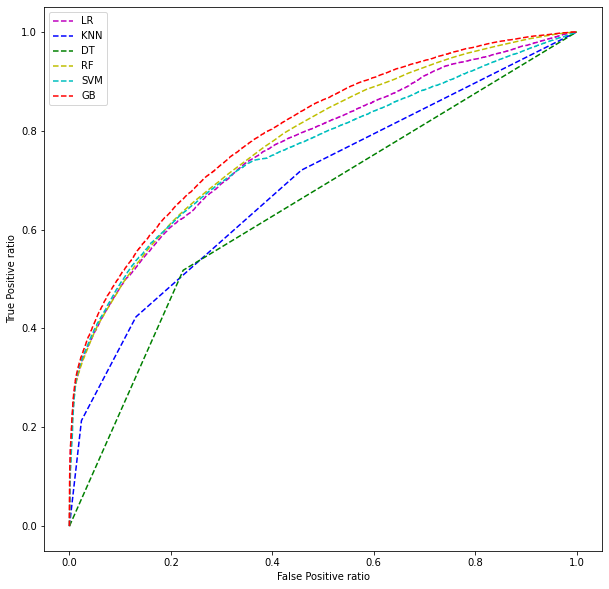

In [169]:
plt.figure(figsize=(10,10))
plt.plot(fprlr,tprlr,label='LR',c='m',linestyle='dashed')
plt.plot(fprknn,tprknn,label='KNN',c='b',linestyle='dashed')
plt.plot(fprdt,tprdt,label='DT',c='g',linestyle='dashed')
plt.plot(fprrf,tprrf,label='RF',c='y',linestyle='dashed')
plt.plot(fprsvm,tprsvm,label='SVM',c='c',linestyle='dashed')

#plt.plot(fprv,tprv,label='Vote',c='b',linestyle='dashed')
plt.plot(fprgb,tprgb,label='GB',c='r',linestyle='dashed')
plt.xlabel("False Positive ratio")
plt.ylabel("True Positive ratio")
plt.legend()

In [170]:
importance=pd.DataFrame({'importance':model_GBC.feature_importances_} ,index=X_train.columns)

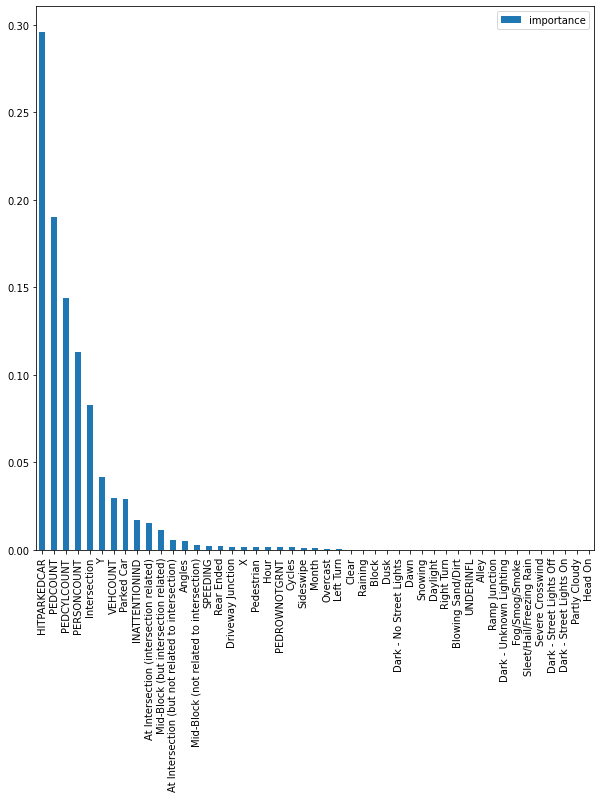

In [171]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
importance.sort_values(by='importance',ascending=False).plot(kind='bar',ax=ax)